In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
filepaths = []
category = os.listdir('/content/drive/MyDrive/data/plant-seedlings-classification/train')
for name_1 in category:
  for name in os.listdir('/content/drive/MyDrive/data/plant-seedlings-classification/train/'+name_1):
    filepaths.append('/content/drive/MyDrive/data/plant-seedlings-classification/train/'+name_1+'/'+name)

In [4]:
len(filepaths)

4750

In [4]:
def creating_list(number,n):
  l1 = []
  for i in range(0,int(number)):
    l1.append(n)
  return l1

In [5]:
a = creating_list(263,'Black-grass')
b = creating_list(390,'Charlock')
c = creating_list(287,'Cleavers')
d = creating_list(611,'Common Chickweed')
e = creating_list(221,'Common wheat')
f = creating_list(475,'Fat Hen')
g = creating_list(654,'Loose Silky-bent')
h = creating_list(221,'Maize')
i = creating_list(516,'Scentless Mayweed')
j = creating_list(231,'Shepherds Purse')
k = creating_list(496,'Small-flowered Cranesbill')
l = creating_list(385,'Sugar beet')


In [6]:
plant_type = a+b+c+d+e+f+g+h+i+j+k+l

In [7]:
len(plant_type)

4750

In [8]:
labels = pd.Series(plant_type)

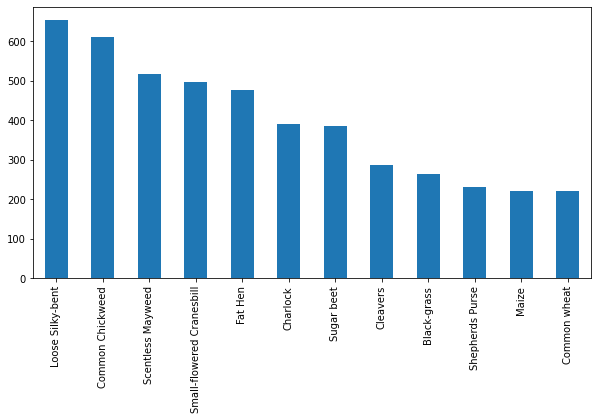

In [9]:
plt.figure(figsize=(10,5))
labels.value_counts().plot(kind = 'bar')

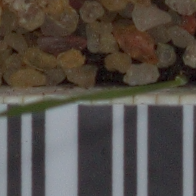

In [10]:
from IPython.display import Image
Image(filepaths[0])

In [11]:
from matplotlib.image import imread

In [13]:
dim1 = []
dim2 = []

for name in filepaths:
  img = imread(name)
  d1,d2,color = img.shape
  
  dim1.append(d1)
  dim2.append(d2)

KeyboardInterrupt: ignored

In [49]:
np.mean(dim1)

370.7301052631579

In [50]:
np.mean(dim2)

371.46589473684213

In [12]:
image_shape = (256,256,3)

In [2]:
# image processing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

In [55]:
image_gen.random_transform(imread(filepaths[0]))

array([[[0.27173778, 0.20810808, 0.17281397],
        [0.28281295, 0.22029783, 0.18454373],
        [0.2850421 , 0.22364159, 0.1856583 ],
        ...,
        [0.30966526, 0.2336423 , 0.1733056 ],
        [0.26325136, 0.191406  , 0.1352469 ],
        [0.20851508, 0.14009073, 0.08302488]],

       [[0.22985911, 0.16319245, 0.12839243],
        [0.24274011, 0.17669393, 0.14139982],
        [0.25611517, 0.1911836 , 0.15588948],
        ...,
        [0.29962954, 0.22551054, 0.16707781],
        [0.24489325, 0.17419527, 0.11918356],
        [0.19015698, 0.12288001, 0.06466679]],

       [[0.19298555, 0.12642248, 0.09494633],
        [0.20327792, 0.13661125, 0.10422769],
        [0.2155384 , 0.14887173, 0.11537359],
        ...,
        [0.28127146, 0.20829982, 0.15101448],
        [0.22653516, 0.15698455, 0.10104497],
        [0.1766326 , 0.11157717, 0.0538278 ]],

       ...,

       [[0.22388214, 0.21176471, 0.22745098],
        [0.22352941, 0.214833  , 0.22745098],
        [0.22352941, 0

In [23]:
pip install split-folders

In [25]:
import splitfolders

splitfolders.ratio("/content/drive/MyDrive/data/plant-seedlings-classification/images/val", output="/content/drive/MyDrive/data/plant-seedlings-classification/small-dataset", seed=1337, ratio=(.9, .1), group_prefix=None) # default values


Copying files: 956 files [10:36,  1.50 files/s]


In [15]:
 image_gen.flow_from_directory('/content/drive/MyDrive/data/plant-seedlings-classification/images/train')

Found 3794 images belonging to 12 classes.


In [16]:
image_gen.flow_from_directory('/content/drive/MyDrive/data/plant-seedlings-classification/images/val')

Found 956 images belonging to 12 classes.


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPool2D,Conv2D,Flatten,BatchNormalization,GlobalMaxPool2D

In [22]:
 tf.keras.backend.clear_session()
 model = Sequential()

 model.add(tf.keras.layers.InputLayer(input_shape=[256,256,3]))

 model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
 model.add(MaxPool2D())
 model.add(BatchNormalization())
 model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
 model.add(MaxPool2D())
 model.add(BatchNormalization())

 
 
 
 

 
 model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
 model.add(MaxPool2D())
 model.add(GlobalMaxPool2D())
 #model.add(Conv2D(filters=128,kernel_size=(2,2),input_shape=(130,131,3),activation='relu'))
 #model.add(BatchNormalization())
 #model.add(MaxPool2D(pool_size=(2,2)))
 #model.add(Dropout(0.25))


# model.add(Conv2D(filters=256,kernel_size=(2,2),input_shape=(130,131,3),activation='relu'))
 #model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(130,131,3),activation='relu'))
 #model.add(BatchNormalization())
 #model.add(MaxPool2D(pool_size=(2,2)))

 #model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(130,131,3),activation='relu'))
 #model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(130,131,3),activation='relu'))
 #model.add(BatchNormalization())
 #model.add(MaxPool2D(pool_size=(2,2)))
 #model.add(Dropout(0.28))

 #model.add(GlobalAveragePooling2D())

 #model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(130,131,3),activation='relu'))
 #model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(130,131,3),activation='relu'))
 #model.add(MaxPool2D())
 model.add(Flatten())


 model.add(Dense(128,activation='relu'))
 model.add(Dropout(0.2))

 model.add(Dense(64,activation='relu'))
 #model.add(Dropout(0.26))
 model.add(BatchNormalization())

 model.add(Dense(12,activation='softmax'))

 model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 128)       3

In [15]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#normalize data
model.add(tf.keras.layers.InputLayer(input_shape=(256,256,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#Add Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))


#Add Dropout
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add batchnorm
model.add(tf.keras.layers.BatchNormalization())

#Add Output Layer
model.add(tf.keras.layers.Dense(12, activation='softmax'))

#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Model Summary
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience = 10)

In [16]:
train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/data/plant-seedlings-classification/images/train',
                                                target_size=(256,256),
                                                color_mode = 'rgb',
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 3794 images belonging to 12 classes.


In [17]:
valid_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/data/plant-seedlings-classification/images/val',
                                                target_size=(256,256),
                                                color_mode = 'rgb',
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 956 images belonging to 12 classes.


In [18]:
train_image_gen.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [19]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/data/plant-seedlings-classification/plant_classifier.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

In [ ]:
results = model.fit(train_image_gen,epochs=200,validation_data=valid_image_gen,steps_per_epoch=3794//32,validation_steps=956//32,verbose = 1,callbacks=[model_checkpoint])

Epoch 1/200
118/118 [==============================] - 2517s 21s/step - loss: 2.6036 - accuracy: 0.1495 - val_loss: 3.6082 - val_accuracy: 0.1336

Epoch 00001: val_accuracy improved from -inf to 0.13362, saving model to /content/drive/MyDrive/data/plant-seedlings-classification/plant_classifier.h5
Epoch 2/200
118/118 [==============================] - 111s 941ms/step - loss: 1.5965 - accuracy: 0.4640 - val_loss: 1.7060 - val_accuracy: 0.3944

Epoch 00002: val_accuracy improved from 0.13362 to 0.39440, saving model to /content/drive/MyDrive/data/plant-seedlings-classification/plant_classifier.h5
Epoch 3/200
118/118 [==============================] - 111s 940ms/step - loss: 1.1724 - accuracy: 0.6039 - val_loss: 1.1499 - val_accuracy: 0.5787

Epoch 00003: val_accuracy improved from 0.39440 to 0.57866, saving model to /content/drive/MyDrive/data/plant-seedlings-classification/plant_classifier.h5
Epoch 4/200
118/118 [==============================] - 111s 939ms/step - loss: 0.9354 - accurac

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/data/plant-seedlings-classification/model.h5')

In [34]:
prediction = model.predict_classes(valid_image_gen)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(valid_image_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.11      0.02      0.03        53
           1       0.96      0.63      0.76        78
           2       0.85      0.50      0.63        58
           3       0.91      0.82      0.86       123
           4       0.78      0.64      0.71        45
           5       0.62      0.87      0.72        95
           6       0.65      0.91      0.76       131
           7       0.84      0.82      0.83        45
           8       0.56      0.88      0.69       104
           9       0.76      0.47      0.58        47
          10       0.84      0.89      0.86       100
          11       0.91      0.64      0.75        77

    accuracy                           0.73       956
   macro avg       0.73      0.67      0.68       956
weighted avg       0.74      0.73      0.72       956



In [37]:
prediction 

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  4,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  0,  6,  6,  6,  6,  6,  6,  6,  6,  6,  4,  6,  4,  6,
        6,  6,  1,  8,  8,  1,  1,  1,  1,  5,  1,  1,  1, 11,  1,  9,  1,
        2,  1,  1,  8, 10,  1,  2,  1,  1,  1,  1,  1,  7, 10,  8, 10,  5,
        1,  1,  1,  5,  1,  1, 10,  1,  1,  8,  1,  1, 10,  1,  8,  8, 10,
        1,  1,  8,  1,  1,  1,  2,  9,  1,  1,  1,  8,  8,  1,  1,  1,  1,
        1,  1,  1,  1,  7,  2,  1,  1,  1,  1,  2,  1,  5, 10,  2,  5,  2,
        2,  8,  8,  5,  1,  8,  2,  2,  2,  2,  1,  2,  8,  2,  2,  5,  2,
        2,  5,  8,  2,  4,  2,  8, 11,  2, 10, 10, 10,  8,  5,  8, 10,  2,
        2,  5,  2,  5,  2,  2,  5, 11,  2,  5,  2,  2,  8,  2,  2,  2,  2,
        2,  2,  5,  3,  3,  5,  3,  3,  3,  8,  8,  3,  3,  8,  3,  3,  8,
        9,  3,  8,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [39]:
valid_image_gen.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [42]:
from sklearn.metrics import confusion_matrix

In [44]:
a = confusion_matrix(valid_image_gen.classes,prediction)

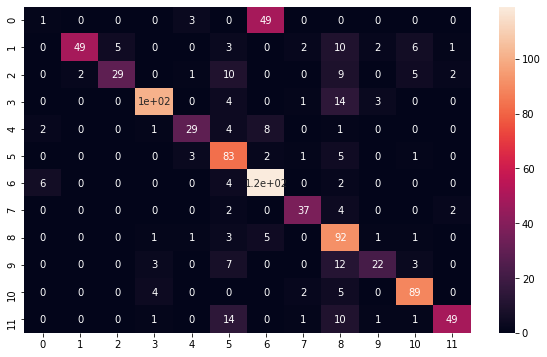

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(a,annot=True)

In [3]:
import os,pandas as pd,numpy as np
test_path = []
l1 = os.listdir('/content/drive/MyDrive/data/plant-seedlings-classification/test')

for name in l1:
  test_path.append('/content/drive/MyDrive/data/plant-seedlings-classification/test/'+name)

In [4]:
test_path

['/content/drive/MyDrive/data/plant-seedlings-classification/test/6b9d6f8c9.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6db684fff.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6da892be6.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6c874918c.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6dd095129.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6d6eb3830.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6ba4ef411.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6edb96d45.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6df8e31ea.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6bce55e05.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/6be169e41.png',
 '/content/drive/MyDrive/data/plant-seedlings-classification/test/71e73a8a0.png',
 '/content/drive

In [5]:
from tensorflow.keras.preprocessing import image

In [6]:
my_image = image.load_img(test_path[0],target_size=[256,256,3])

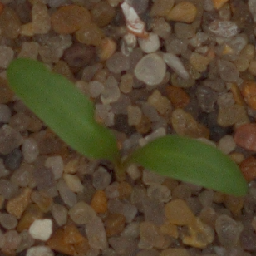

In [7]:
my_image

In [8]:
img_arr = []
for name in test_path:
  image_array = image.img_to_array(image.load_img(name,target_size=(256,256,3)))
  img_arr.append(image_array)

In [9]:
len(img_arr)

794

In [10]:
img_arr = np.array(img_arr)

In [11]:
img_arr.shape

(794, 256, 256, 3)

In [12]:
from tensorflow.keras.models import load_model

In [13]:
model = load_model('/content/drive/MyDrive/data/plant-seedlings-classification/plant_classifier.h5')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [18]:
predictions = model.predict_classes(img_arr)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
predictions

array([11,  8, 10,  0,  3,  9,  2,  2,  1,  2,  9, 11,  5,  9,  7,  0,  5,
        1,  0,  6,  5, 10,  6,  6, 10,  3,  8,  3,  1,  3, 11, 10,  0,  1,
        2,  1,  3,  6, 10,  8,  0,  8,  1,  6, 11,  4,  6,  3,  6,  3, 11,
        8,  8,  5,  6,  3,  6, 11,  8,  3, 11,  1,  7, 10,  9,  4,  1,  6,
        5,  9,  6,  8, 11,  9,  1,  3,  8, 10,  6,  3,  1,  3,  5, 10, 11,
       11,  6,  6,  5,  6,  2, 10, 11,  8,  7, 10,  6, 10, 10,  6,  1,  3,
        0,  5,  6, 10,  2,  5, 10,  8,  9, 11,  3,  3, 10, 11,  9,  8,  1,
        3,  0, 11, 10,  2,  3,  3,  8,  1,  5,  0,  3, 10, 11,  6,  1,  8,
        3,  3,  6,  4,  1,  9, 10,  1,  6,  4,  4, 11,  6,  4,  8,  9,  6,
        8,  6, 10,  3,  5,  7, 10, 10,  9,  4,  6,  6,  3, 10,  6,  6,  1,
       10,  2, 10,  1,  1,  7, 10,  8, 11,  3,  3,  7,  6,  6,  9,  5,  6,
       11,  5, 11,  6,  6,  1,  8, 10,  8,  1,  9,  6,  9,  3,  8,  3,  0,
        0,  4,  0, 11,  2,  6, 10,  6,  3, 10,  3,  6,  6,  8,  9,  3,  2,
        0,  2,  2,  4,  6

In [24]:
preds = list(predictions)

In [25]:
id = []
for name in os.listdir('/content/drive/MyDrive/data/plant-seedlings-classification/test'):
  id.append(name)

In [27]:
labels = pd.DataFrame({'file':id,'Spieces':preds})

In [28]:
labels

,file,Spieces
0,6b9d6f8c9.png,11
1,6db684fff.png,8
2,6da892be6.png,10
3,6c874918c.png,0
4,6dd095129.png,3
...,...,...
789,6982a9d30.png,10
790,66ab0e8d0.png,1
791,686dc7ec8.png,6
792,69d1669f8.png,1


In [29]:
labels['Spieces'].replace([0,1,2,3,4,5,6,7,8,9,10,11],['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','Shepherds Purse','Small-flowered Cranesbill','Sugar beet'],inplace=True)

In [30]:
labels

,file,Spieces
0,6b9d6f8c9.png,Sugar beet
1,6db684fff.png,Scentless Mayweed
2,6da892be6.png,Small-flowered Cranesbill
3,6c874918c.png,Black-grass
4,6dd095129.png,Common Chickweed
...,...,...
789,6982a9d30.png,Small-flowered Cranesbill
790,66ab0e8d0.png,Charlock
791,686dc7ec8.png,Loose Silky-bent
792,69d1669f8.png,Charlock


In [32]:
labels.to_csv('/content/drive/MyDrive/data/plant-seedlings-classification/my_submission.csv',index=False)